✅ Data loaded successfully!

    sepal_length  sepal_width  petal_length  petal_width          species
49           5.0          3.3           1.4          0.2      Iris-setosa
80           5.5          2.4           3.8          1.1  Iris-versicolor
85           6.0          3.4           4.5          1.6  Iris-versicolor
40           5.0          3.5           1.3          0.3      Iris-setosa
21           5.1          3.7           1.5          0.4      Iris-setosa

📐 Shape: (150, 5)

🧾 Data Types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


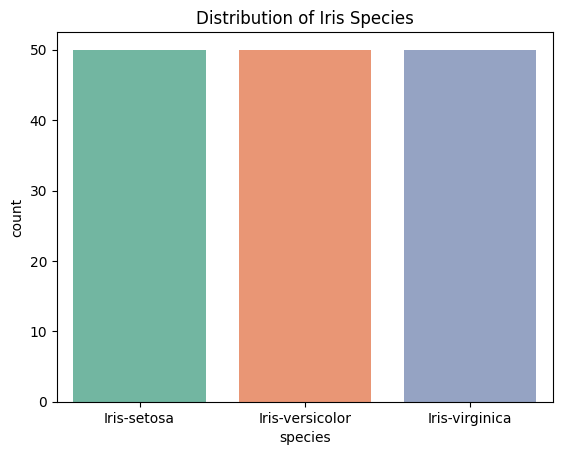

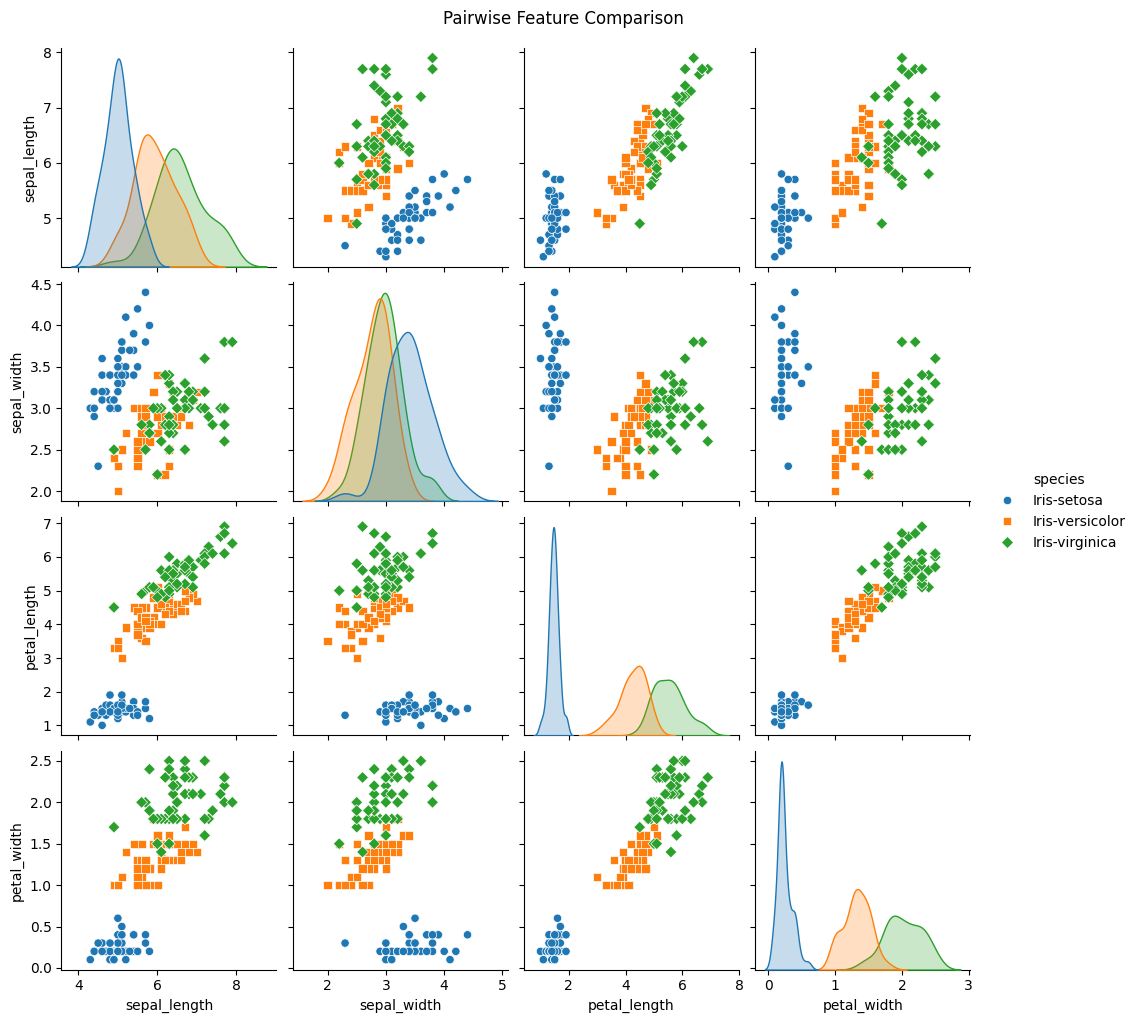

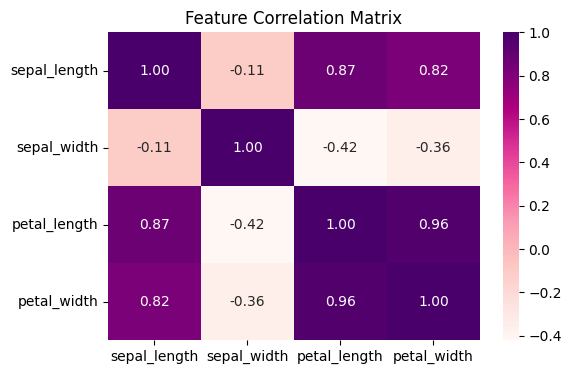


🧪 Random Forest
📊 Accuracy: 97.37 %
🧾 Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



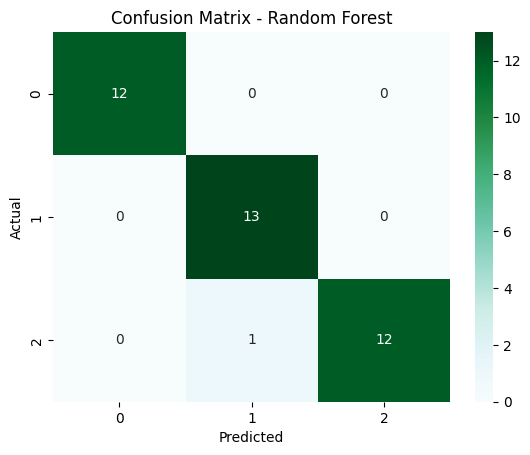


🧪 KNN
📊 Accuracy: 94.74 %
🧾 Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.95        38
      macro avg       0.96      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



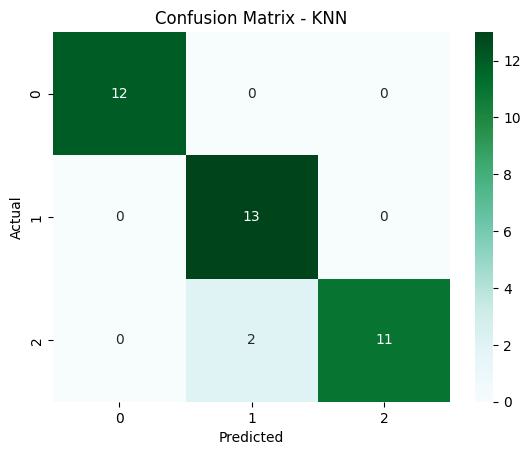


🧪 Logistic Regression
📊 Accuracy: 97.37 %
🧾 Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



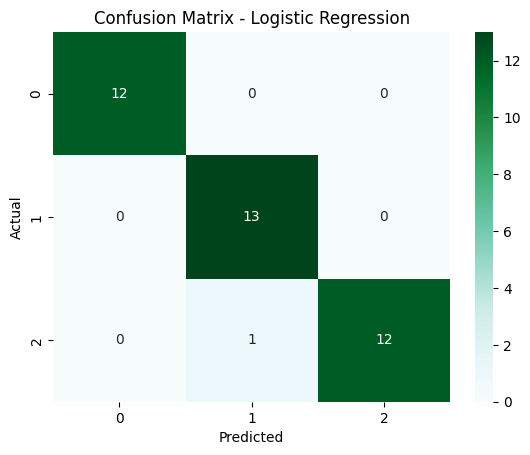


🔄 Cross-Validated Accuracy (Random Forest): 96.0%

📌 Best model based on accuracy and robustness: Random Forest (based on CV + test results).


In [6]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


data = pd.read_csv('IRIS.csv')
print("✅ Data loaded successfully!\n")


print(data.sample(5))
print("\n📐 Shape:", data.shape)
print("\n🧾 Data Types:\n", data.dtypes)


sns.countplot(x='species', hue='species', data=data, palette='Set2', legend=False)
plt.title("Distribution of Iris Species")
plt.show()


sns.pairplot(data, hue='species', diag_kind='kde', markers=["o", "s", "D"])
plt.suptitle("Pairwise Feature Comparison", y=1.02)
plt.show()


plt.figure(figsize=(6, 4))
sns.heatmap(data.drop(columns='species').corr(), annot=True, cmap='RdPu', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

X = data.drop("species", axis=1)
y = data["species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=1, stratify=y
)


models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1),
    "KNN": KNeighborsClassifier(n_neighbors=4),
    "Logistic Regression": LogisticRegression(max_iter=200)
}


for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n🧪 {name}")
    print("📊 Accuracy:", round(acc * 100, 2), "%")
    print("🧾 Report:\n", classification_report(y_test, preds))
    
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, cmap="BuGn", fmt="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

scores = cross_val_score(models["Random Forest"], X_scaled, y, cv=5)
print(f"\n🔄 Cross-Validated Accuracy (Random Forest): {round(scores.mean() * 100, 2)}%")


print("\n📌 Best model based on accuracy and robustness: Random Forest (based on CV + test results).")
